![Resumo](https://i.ibb.co/9qC7ZrF/imagem.jpg)

In [1]:
# Contextualizando

<h2>Projeto Alura Voz: Previsão de Churn em Clientes de Telefonia</h2>
<p>A empresa fictícia Alura Voz tem o objetivo de diminuir as taxas de clientes que cancelam o contrato (Churn rate), uma vez que é mais caro para a empresa conquistar um novo público do que manter a base atual.</p>
<p>Esse projeto foi desenvolvido com o objetivo de utilizar o dataset de clientes da empresa para criar um modelo eficaz em prever se um determinado cliente irá evadir ou não.</p>
<p>Os dados utilizados estão disponíveis <a href="https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json">aqui</a></p></br>
<h3>Etapas do projeto</h3>
<ol>
<li><b>Tratamento dos dados:</b></li>
<ul>
<li>Tratamento de dados ausentes e nulos</li>
<li>Transformação de dados categóricos</li>
<li>Concatenação de json</li>
</ul>
<br>
<li><b>Análise exploratória:</b></li>
<ul>
<li>Análise da taxa de churn</li>
<li>Análise dos tempos dos contrato</li>
<li>Análise de inconsistencia nos dados</li>
<li>Correlação entre as variáveis</li>
</ul>
<br>
<li><b>Machine learning:</b></li>
<ul>
<li>Balanceamento dos dados</li>
<li>Separação dos dados de treino e teste</li>
<li>Aplicação dos 4 modelos utilizados, com cross validation e otimização de hiperparâmetros</li>
<li>Avaliação das métricas</li>
</ul>
</ol>

# Bibliotecas

In [2]:
# importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Importando e tratando os dados

In [3]:
# importando os dados

uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(uri)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# verificando a coluna customer

dados_customer = pd.json_normalize(data=dados.customer)
dados_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
# verificando a coluna phone

dados_phone = pd.json_normalize(data=dados.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [6]:
# verificando a coluna internet

dados_internet = pd.json_normalize(data=dados.internet)
dados_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [7]:
# verificando a coluna account

dados_account = pd.json_normalize(data=dados.account)
dados_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [8]:
# removendo as colunas com json

dados.drop(columns=['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

In [9]:
# concatenando as colunas abertas

dados_total = pd.concat([dados, dados_customer, dados_phone, dados_internet, dados_account], axis=1)
dados_total

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [10]:
# verificando o tamanho do dataset

dados_total.shape

(7267, 21)

In [11]:
# verificando os tipos

dados_total.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [12]:
dados_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
# verificando se existem linhas com valores vazios

(dados_total == '').sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64

In [14]:
# removendo as linhas com valores ausentes na coluna Churn

dados = dados.dropna(subset=['Churn'])

In [15]:
# verificando se existem linhas apenas com espaço

(dados_total == ' ').sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

In [16]:
# ao tentar converter a coluna "Charges.Total" para float ocorreu um erro em relação à presença de valores vazios
# portanto, antes da conversão foi feita a substituição desses valores vazios por zero

dados_total['Charges.Total'] = dados_total['Charges.Total'].replace(" ", 0)
dados_total["Charges.Total"] = dados_total["Charges.Total"].astype(float)

In [17]:
# criando uma nova coluna chamada "total_cobrancas_conferindo" para verificar a consistencia dos dados
# além disso, criando uma coluna "diferenca_conferida" para registrar essa possível diferença

dados_total['total_cobrancas_conferindo'] = dados_total['tenure'] * dados_total['Charges.Monthly'] #calculando o gasto total do cliente
dados_total['diferenca_conferida'] = dados_total['Charges.Total'] - dados_total['total_cobrancas_conferindo'] #verificando a diferença entre os valores
dados_total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,total_cobrancas_conferindo,diferenca_conferida
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70


In [18]:
# criando uma coluna com os gastos diários

dados_total['Gasto_diario'] = round(dados_total['Charges.Monthly'] / 30, 2)
dados_total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,total_cobrancas_conferindo,diferenca_conferida,Gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,590.4,2.90,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,539.1,3.30,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,295.6,-14.75,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1274.0,-36.15,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,251.7,15.70,2.80


In [19]:
# transformando os dados categóricos da coluna "InternetService" em numéricos

provedor = {'DSL':2, 
            'Fiber optic':1, 
            'No': 0}
dados_total['InternetService'] = dados_total['InternetService'].map(provedor)

In [20]:
# transformando os dados categóricos da coluna "Contract" em numéricos

contrato = {"One year": 12,
           'Month-to-month': 1,
           'Two year': 24}
dados_total['Contract'] = dados_total['Contract'].map(contrato)

In [21]:
# transformando os demais dados categóricos em numéricos

dados_total = dados_total.replace("No internet service", 2)
dados_total = dados_total.replace("No phone service", 2)
dados_total = dados_total.replace("Yes", 1)
dados_total = dados_total.replace("No", 0)
dados_total.gender = dados_total.gender.astype("category").cat.codes
dados_total.Contract = dados_total.Contract.astype("category").cat.codes
dados_total.PaymentMethod = dados_total.PaymentMethod.astype("category").cat.codes

In [22]:
dados_total.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,total_cobrancas_conferindo,diferenca_conferida,Gasto_diario
0,0002-ORFBO,0,0,0,1,1,9,1,0,2,...,1,0,1,1,3,65.6,593.30,590.4,2.90,2.19
1,0003-MKNFE,0,1,0,0,0,9,1,1,2,...,0,1,0,0,3,59.9,542.40,539.1,3.30,2.00
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,...,0,0,0,1,2,73.9,280.85,295.6,-14.75,2.46
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,...,1,1,0,1,2,98.0,1237.85,1274.0,-36.15,3.27
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,...,1,0,0,1,3,83.9,267.40,251.7,15.70,2.80


In [23]:
dados_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7267 non-null   object 
 1   Churn                       7267 non-null   object 
 2   gender                      7267 non-null   int8   
 3   SeniorCitizen               7267 non-null   int64  
 4   Partner                     7267 non-null   int64  
 5   Dependents                  7267 non-null   int64  
 6   tenure                      7267 non-null   int64  
 7   PhoneService                7267 non-null   int64  
 8   MultipleLines               7267 non-null   int64  
 9   InternetService             7267 non-null   int64  
 10  OnlineSecurity              7267 non-null   int64  
 11  OnlineBackup                7267 non-null   int64  
 12  DeviceProtection            7267 non-null   int64  
 13  TechSupport                 7267 

In [24]:
# verificando se a coluna Churn possui algum valor não esperado

valores_unicos = dados_total["Churn"].unique()
print(valores_unicos)

[0 1 '']


In [25]:
# verificando a quantidade de valores nulos na coluna Churn

dados_total['Churn'].value_counts()['']

224

In [26]:
# selecionando apenas as linhas que nao possuem os valores vazios, como são poucas

dados_total = dados_total.query("Churn != ''")

In [27]:
# convertendo a coluna Churn de string para inteiros

dados_total.Churn = dados_total.Churn.astype(int)

In [28]:
dados_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7043 non-null   object 
 1   Churn                       7043 non-null   int32  
 2   gender                      7043 non-null   int8   
 3   SeniorCitizen               7043 non-null   int64  
 4   Partner                     7043 non-null   int64  
 5   Dependents                  7043 non-null   int64  
 6   tenure                      7043 non-null   int64  
 7   PhoneService                7043 non-null   int64  
 8   MultipleLines               7043 non-null   int64  
 9   InternetService             7043 non-null   int64  
 10  OnlineSecurity              7043 non-null   int64  
 11  OnlineBackup                7043 non-null   int64  
 12  DeviceProtection            7043 non-null   int64  
 13  TechSupport                 7043 

# Explorando os dados

In [29]:
# renomeando as categorias

categorias = {0: 'Clientes Ativos', 1: 'Clientes em Churn'}
dados_total['Churn'] = dados_total['Churn'].replace(categorias)

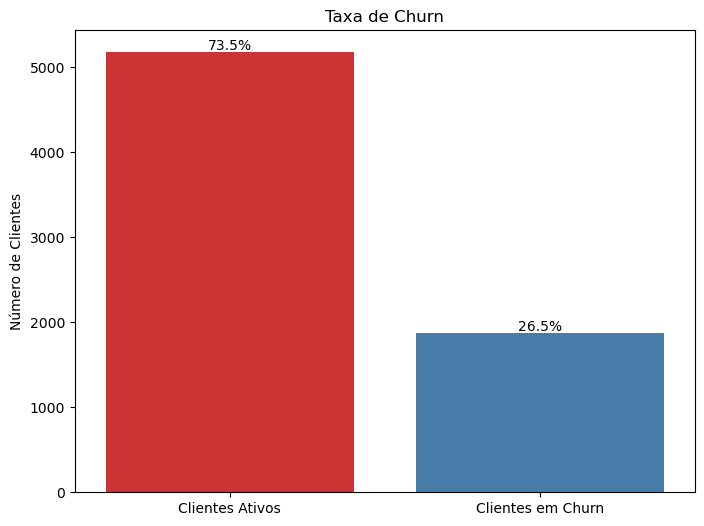

In [30]:
# gerando o gráfico de barras com a taxa de Churn

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=dados_total, palette='Set1')
plt.title('Taxa de Churn')
plt.xlabel('')
plt.ylabel('Número de Clientes')
total = len(dados_total)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., height+29, '{:.1f}%'.format(height/total*100), ha="center")
plt.show()

No gráfico podemos notar que essa empresa tem 26,5% de clientes em churn. Esse número pode ser significativamente prejudicial para o negócio, já que pode representar um número expressivo de perda de clientes.

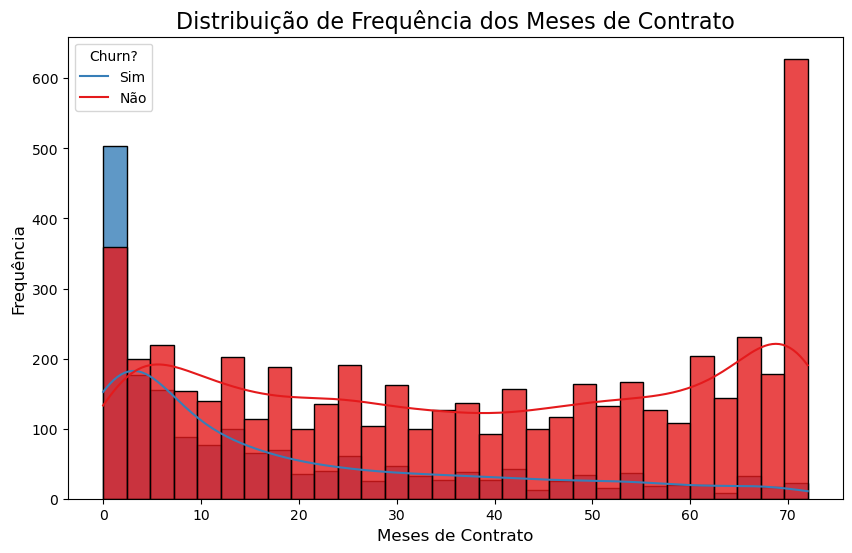

In [31]:
# plotando a distribuição de frequência do Churn em relação ao tempo de contrato

plt.figure(figsize=(10,6))
sns.histplot(data=dados_total, x='tenure', hue='Churn', kde=True, palette=['#e41a1c', '#377eb8'], alpha=0.8, bins=30)
plt.title('Distribuição de Frequência dos Meses de Contrato', fontsize=16)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(title='Churn?', labels=['Sim', 'Não'])
plt.show()

Os clientes em churn estão, geralmente, nos primeiros meses de contrato. Clientes mais antigos possuem taxa menores de saída.

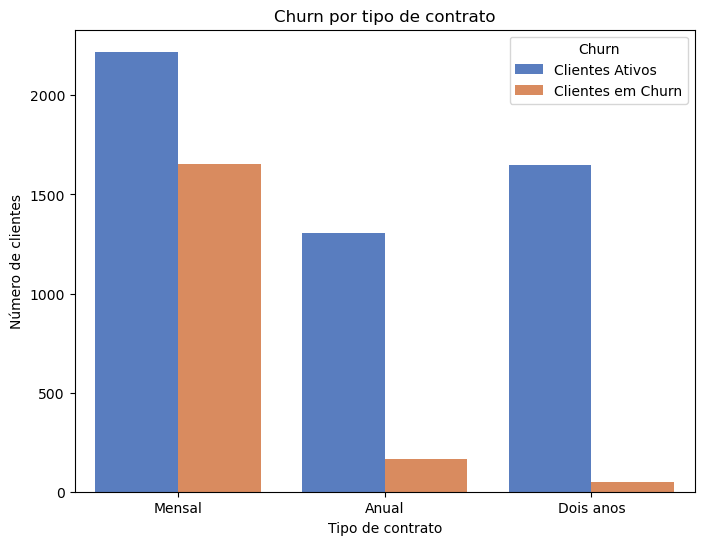

In [32]:
# verificando a proporção de clientes em churn em cada tipo de contrato

plt.figure(figsize=(8,6))
sns.countplot(data=dados_total, x='Contract', hue='Churn', palette='muted')
plt.title('Churn por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.xticks([0, 1, 2], ['Mensal', 'Anual', 'Dois anos'])
plt.show()

É possível notar que a taxa de cientes em churn é maior entre aqueles que possuem o contrato do tipo mensal.

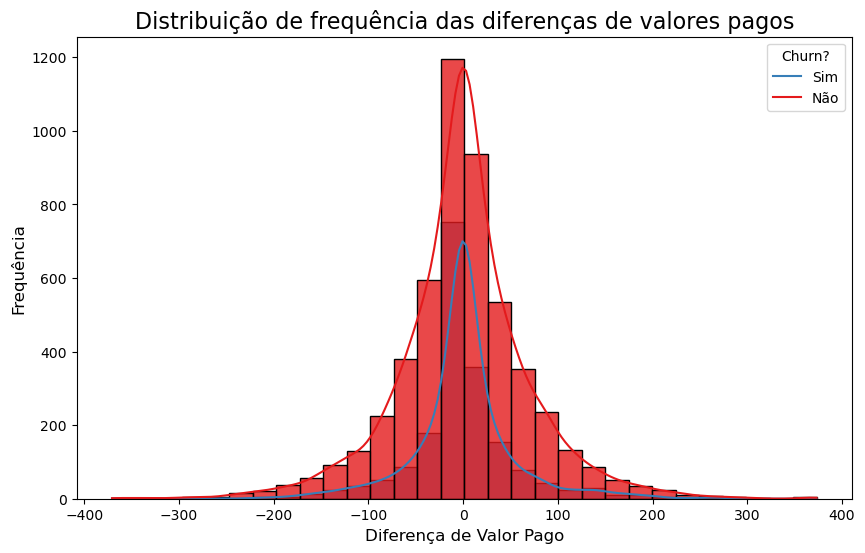

In [33]:
# como verificamos a consistência dos dados, plotamos a distribuição das diferenças encontradas (ou seja, os erros de cobrança)

plt.figure(figsize=(10,6))
sns.histplot(data=dados_total, x='diferenca_conferida', hue='Churn', kde=True, palette=['#e41a1c', '#377eb8'], alpha=0.8, bins=30)
plt.title('Distribuição de frequência das diferenças de valores pagos', fontsize=16)
plt.xlabel('Diferença de Valor Pago', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(title='Churn?', labels=['Sim', 'Não'])
plt.show()

Não foi possível associar o churn aos erros de cobrança.

In [34]:
# removendo colunas calculadas

dados_total.drop(columns=["total_cobrancas_conferindo", 'diferenca_conferida', 'Gasto_diario'], axis=1, inplace=True)

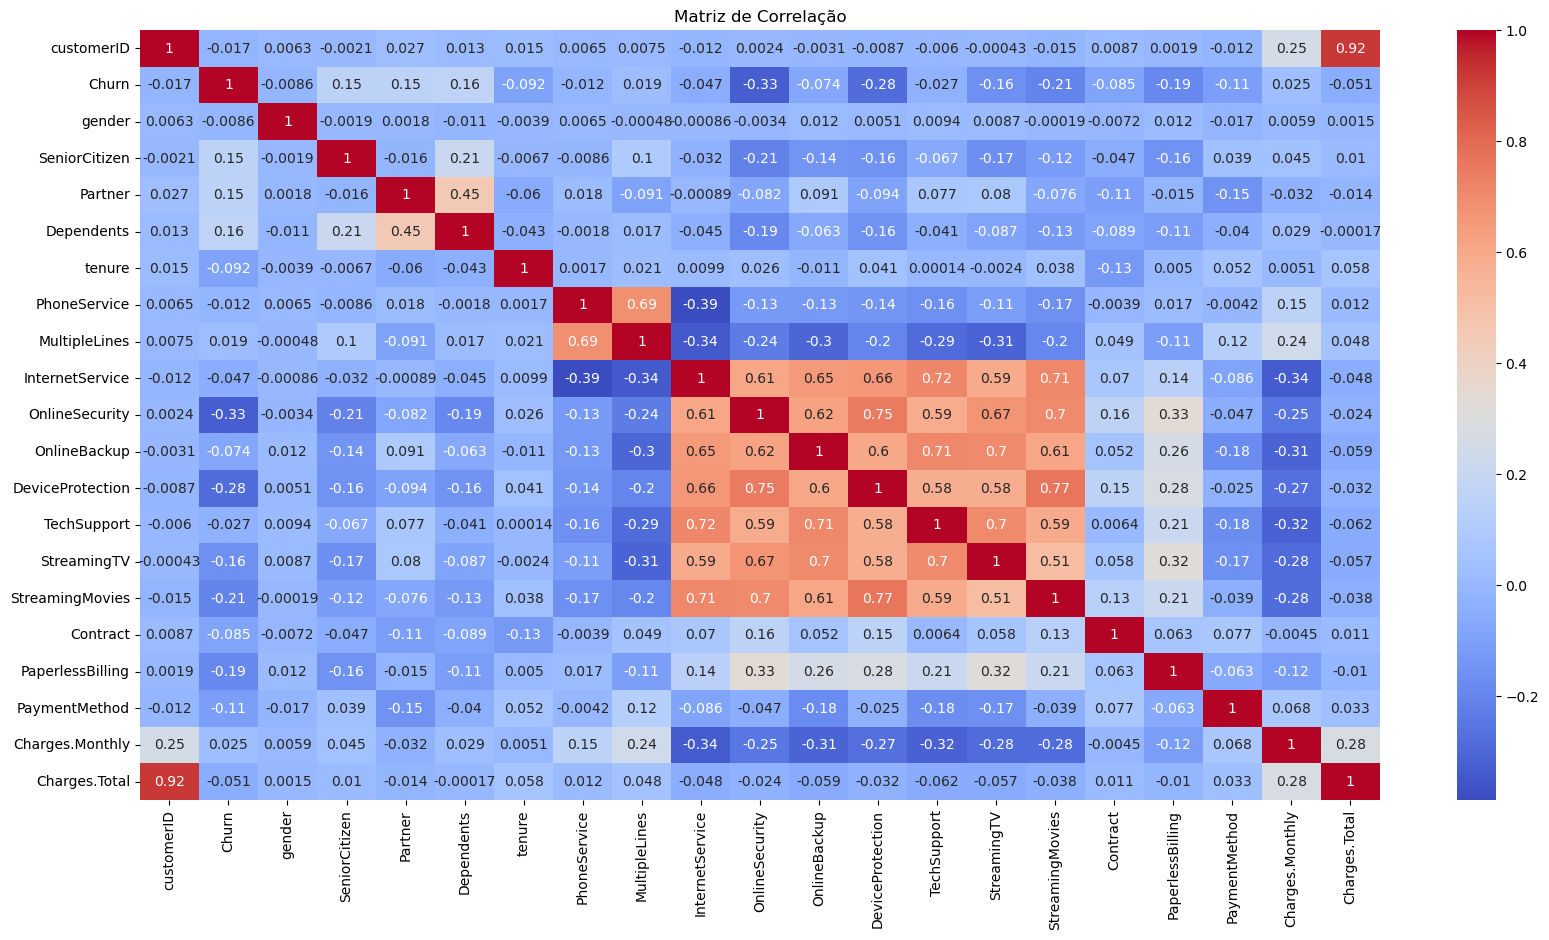

In [35]:
# criando um heatmap com as correlações entre as variáveis

corr = dados_total.apply(lambda x: pd.factorize(x)[0]).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [36]:
# removendo as variáveis altamente correlacionadas

mask = corr > 0.85
cols_to_keep = mask.sum() == 1 | ~mask.all(axis=1)
dados_clean = dados_total.loc[:, cols_to_keep]

In [37]:
dados_clean.shape

(7043, 19)

### Balanceamento dos dados

O balanceamento dos dados é importante em modelos de machine learning para prever churn, porque o desbalanceamento pode levar a um modelo enviesado, ou seja, o modelo pode ser mais preciso na classificação da classe majoritária (não-churn) e menos preciso na classificação da classe minoritária (churn). Isso ocorre porque o modelo é treinado com mais exemplos da classe majoritária, o que pode fazer com que ele aprenda mais sobre essa classe e menos sobre a classe minoritária.

Ao balancear os dados, o modelo é treinado com exemplos iguais das duas classes, tornando-se mais justo em relação às duas classes e reduzindo o viés. O balanceamento dos dados pode ser feito de várias maneiras,aqui optamos pelo SMOTE (Synthetic Minority Over-sampling Technique), que gera exemplos sintéticos da classe minoritária.

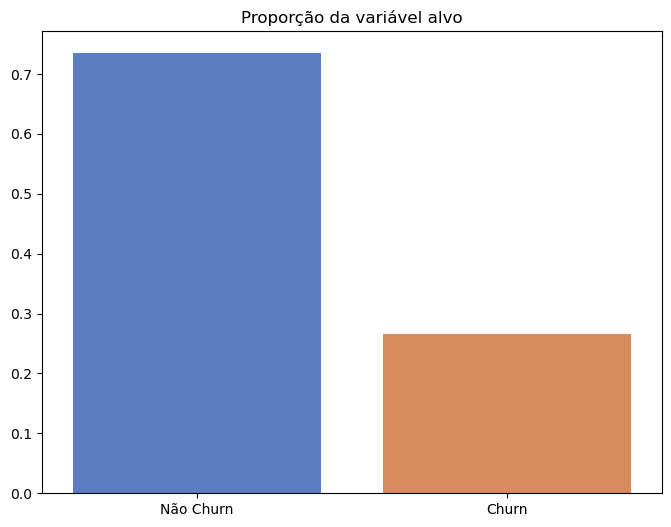

In [38]:
# verificando a proporção da variável alvo

plt.figure(figsize = (8, 6))
sns.barplot(x = ["Não Churn", "Churn"], y = dados_clean["Churn"].value_counts(1).values, palette ='muted')
plt.title("Proporção da variável alvo")
plt.show();

Podemos observar que os dados são desbalaceados. Nesse caso, o modelo de machine learning será influenciado pela grande quantidade de dados "não churn" em comparação com "churn". 
Para tratar essa questão iremos adotar um método de balanceamento do datset.

In [39]:
# definindo a variável alvo

X = dados_clean.drop(['Churn'], axis = 1)
y = dados_clean['Churn']

In [40]:
# balanceando com SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [41]:
# criando um dataframe com os dados balanceados

dados_balanceados = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

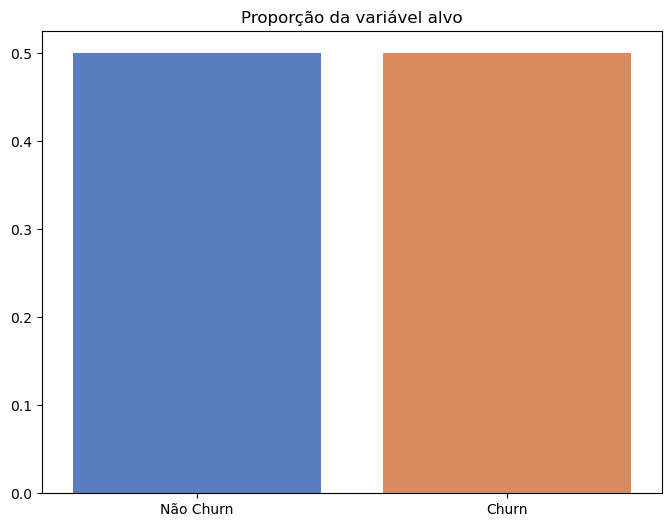

In [42]:
# verificando a proporção da variável alvo após o balanceamento

plt.figure(figsize = (8, 6))
sns.barplot(x = ["Não Churn", "Churn"], y = dados_balanceados["Churn"].value_counts(1).values, palette ='muted')
plt.title("Proporção da variável alvo")
plt.show();

# Machine Learning

In [43]:
# dividindo os dados em teste e treino

X = dados_balanceados.drop('Churn', axis=1)
y = dados_balanceados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regressão logística

In [44]:
# definindo os hiperparâmetros a serem ajustados
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# criando o modelo de regressão logística
logistic_reg = LogisticRegression()

# ajustando os hiperparâmetros com Grid Search Cross Validation
grid_search_reg = GridSearchCV(logistic_reg, parameters, cv=5, n_jobs=-1)
grid_search_reg.fit(X_train, y_train)
logistic_reg = grid_search_reg.best_estimator_

# obtendo os melhores hiperparâmetros
best_params = grid_search_reg.best_params_

# criando e ajusta o modelo de regressão logística com os melhores hiperparâmetros
logistic_reg = LogisticRegression(penalty=best_params['penalty'],
                                   C=best_params['C'],
                                   solver=best_params['solver'],
                                   max_iter=1000)
logistic_reg.fit(X_train, y_train)


# fazendo previsões no conjunto de teste
y_pred_reg= logistic_reg.predict(X_test)

# calculando as probabilidades das classes positivas
y_prob = logistic_reg.predict_proba(X_test)[:, 1]

# avaliando o desempenho do modelo
print(classification_report(y_test, y_pred_reg))

roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc * 100:.2f}%")


                   precision    recall  f1-score   support

  Clientes Ativos       0.81      0.76      0.78      1588
Clientes em Churn       0.76      0.82      0.79      1517

         accuracy                           0.79      3105
        macro avg       0.79      0.79      0.79      3105
     weighted avg       0.79      0.79      0.79      3105

ROC AUC Score: 86.96%


In [45]:
# registrando quais foram os melhores hiperparâmetros

print(grid_search_reg.best_params_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


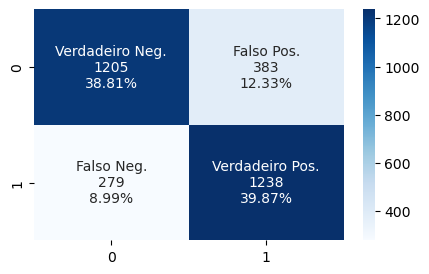

In [46]:
# plotando a matriz de confusão

cm = confusion_matrix(y_test, y_pred_reg)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

## Decision Tree Classifier

In [47]:
# definindo os parâmetros a serem testados
params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# criando e ajustando o modelo de árvore de decisão com Grid Search CV
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, params, cv=5)
grid_search_dt.fit(X_train, y_train)

# fazendo as previsões no conjunto de teste usando o modelo ajustado
y_pred_dt = grid_search_dt.predict(X_test)
dt = grid_search_dt.best_estimator_

# ajustando o modelo Random Forest
dt.fit(X_train, y_train)

# avaliando o desempenho do modelo ajustado
print(classification_report(y_test, y_pred_dt))

y_prob = grid_search_dt.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc * 100:.2f}%")

                   precision    recall  f1-score   support

  Clientes Ativos       0.82      0.76      0.79      1588
Clientes em Churn       0.77      0.83      0.80      1517

         accuracy                           0.79      3105
        macro avg       0.80      0.79      0.79      3105
     weighted avg       0.80      0.79      0.79      3105

ROC AUC Score: 85.33%


In [48]:
# registrando quais foram os melhores hiperparâmetros

print(grid_search_dt.best_params_)

{'max_depth': 9, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


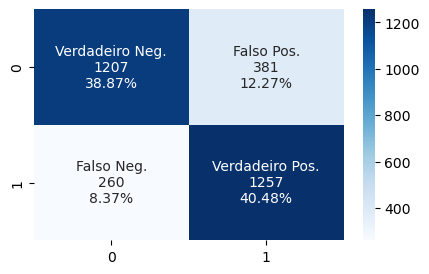

In [49]:
# plotando a matriz de confusão

cm = confusion_matrix(y_test, y_pred_dt)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

## Random Forest Classifier

In [50]:
# definindo modelo
rfc = RandomForestClassifier(random_state=42)

# definindo espaço de busca de hiperparâmetros
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# definindo estratégia de validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# realziando busca em grade de hiperparâmetros
rfc_grid = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv,
    scoring="f1",
    n_jobs=-1,
    error_score=0
    
)

# treinando modelo com busca em grade de hiperparâmetros
rfc_grid.fit(X_train, y_train)
rfc = rfc_grid.best_estimator_

# ajustando o modelo Random Forest
rfc.fit(X_train, y_train)

# fazendo as previsões no conjunto de teste usando o modelo ajustado
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc))

y_prob = rfc_grid.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc * 100:.2f}%")

                   precision    recall  f1-score   support

  Clientes Ativos       0.79      0.73      0.76      1588
Clientes em Churn       0.74      0.80      0.77      1517

         accuracy                           0.77      3105
        macro avg       0.77      0.77      0.77      3105
     weighted avg       0.77      0.77      0.77      3105

ROC AUC Score: 86.17%


In [51]:
print("Melhores hiperparâmetros:", rfc_grid.best_params_)

Melhores hiperparâmetros: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


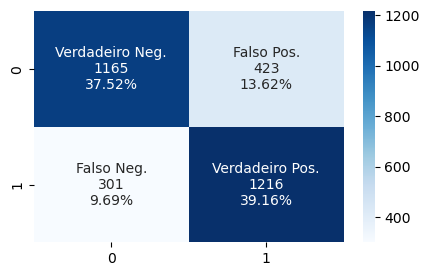

In [52]:
# plotando a matriz de confusão

cm = confusion_matrix(y_test, y_pred_rfc)
nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5, 3))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.show();

## Support Vector Machine

In [ ]:
# definindo os hiperparâmetros a serem ajustados
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

# criando o modelo SVM
svm = SVC()

# ajustando os hiperparâmetros com Grid Search Cross Validation
grid_search_svm = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
svm = grid_search_svm.best_estimator_

# obtendo os melhores hiperparâmetros
best_params = grid_search_svm.best_params_

# criando e ajusta o modelo SVM com os melhores hiperparâmetros
svm = SVC(C=best_params['C'], kernel=best_params['kernel'], probability=True)
svm.fit(X_train, y_train)

In [ ]:
# fazendo previsões no conjunto de teste
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# avaliando o desempenho do modelo
print(classification_report(y_test, y_pred_svm))

roc = roc_auc_score(y_test, y_prob_svm)
print(f"ROC AUC Score: {roc * 100:.2f}%")

## Comparando os modelos

In [ ]:
# criando um DataFrame com as métricas de cada modelo

log_reg_metrics = pd.DataFrame(classification_report(y_test, y_pred_reg, output_dict=True)).T
svm_metrics = pd.DataFrame(classification_report(y_test, y_pred_svm, output_dict=True)).T
dt_metrics = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).T
rfc_metrics = pd.DataFrame(classification_report(y_test, y_pred_rfc, output_dict=True)).T


In [ ]:
log_reg_metrics

In [ ]:
svm_metrics

In [ ]:
dt_metrics

In [ ]:
rfc_metrics

No nosso caso, de identificação os clientes em Churn, podemos optar por utilizar o modelo com maior Recall: <b>Decision Tree Classifier</b>.

Caso a precisão fosse muito menor do que o recall, uma boa opção sera avaliar o quanto a empresa ganharia com os acertos mesmo descontando os erros do modelo. Porém, no nosso caso, a precisão (métrica de avaliação que mede a proporção de resultados corretos entre o total de resultados positivos previstos pelo modelo) está próxima do valor de recall.

Lembrbando que o recall é uma métrica de avaliação de modelos de classificação que mede a capacidade do modelo em identificar corretamente os exemplos positivos. Em outras palavras, o recall mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo em relação ao total de exemplos positivos presentes no conjunto de dados.. Essa métricas mede a capacidade do modelo em identificar corretamente os exemplos positivos. Em outras palavras, o recall mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo em relação ao total de exemplos positivos presentes no conjunto de dados.


# Conclusao

Esse projeto teve como objetivo prever os clientes de uma empresa de telefonia com maior propensão a cancelar o contrato.
Esse tipo de estratégia é importante para as empresas levando em conta que é muito mais caro conquistar novos clientes do que manter os atuais.

Após todo o tratamento e exploração do dataset, eu testei 4 modelos: Logistic Regression, Decision Tree Classifier, Random Forest Classifier e Support Vector Machine. Considerei o recall como a métrica mais importante para o problema de negócio em questão, uma vez que ela mostra o quanto o modelo consegue identificar quem realmente irá cancelar o contrato. Logo, o modelo mais adequado nessa situação foi o Decision Tree Classifier.

### Vale a pena investir nessa estratégia?
Um modelo de prever churn é extremamente importante para empresas de telefonia, pois a retenção de clientes é fundamental para manter a rentabilidade e competitividade no mercado. Através da identificação de clientes propensos a deixarem a empresa, é possível desenvolver estratégias específicas para mantê-los, como oferecer descontos, upgrades de planos ou outros benefícios. Além disso, um modelo de prever churn permite que o negócio possa se antecipar a possíveis problemas de qualidade de serviço ou insatisfação dos clientes, possibilitando ações preventivas para evitar que esses problemas se transformem em cancelamentos.
